In [1]:
from matplotlib import pyplot as plt
import os
import scipy.io.wavfile as wav
import numpy as np

In [2]:
%matplotlib inline

In [3]:
wavs = os.listdir('./dataset/wav')
wavs = [wav for wav in wavs if wav.endswith('wav')]
w = wavs[0]

In [4]:
data = wav.read(os.path.join('./dataset/wav/', w))

In [5]:
np_arr = data[1].astype('float32') / 32767.0

In [19]:
len(np_arr)

28637039

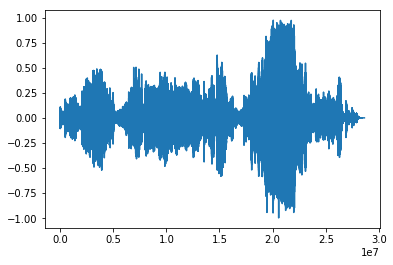

In [7]:
plt.plot(np_arr)

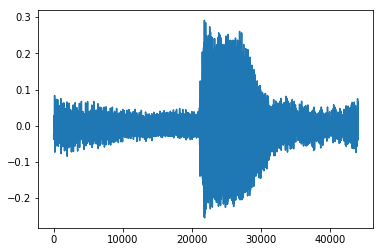

In [20]:
plt.plot(np_arr[100*44100:101*44100])

In [11]:
seq_len = 44100

In [12]:
num_blocks = len(np_arr) // seq_len
print(num_blocks)

649


In [13]:
blocks = []

In [14]:
cur_pointer = 0

In [15]:
while cur_pointer < num_blocks:
    block = np_arr[cur_pointer*seq_len:(cur_pointer+1)*seq_len]
    if block.shape[0] < seq_len:
        padding = np.zeros(seq_len - block.shape[0], )
        block = np.concatenate((block, padding))
    blocks.append(block)
    cur_pointer += 1

In [16]:
fft_blocks = []
target_blocks = []
real_blocks = []
imag_blocks = []

In [17]:
for block in blocks:
    fft_block = np.fft.fft(block)
    target_block = np.concatenate((np.real(fft_block), np.imag(fft_block)))

    real_blocks.append(np.real(fft_block))
    imag_blocks.append(np.imag(fft_block))
    fft_blocks.append(fft_block)
    target_blocks.append(target_block)

/Users/LuciusCao/.pyenv/versions/anaconda3-4.2.0/envs/kara/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


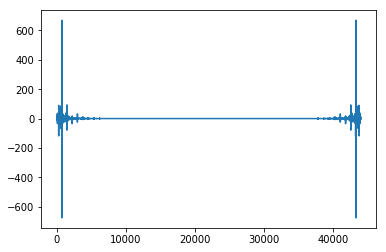

In [18]:
plt.plot(fft_blocks[100])

/Users/LuciusCao/.pyenv/versions/anaconda3-4.2.0/envs/kara/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


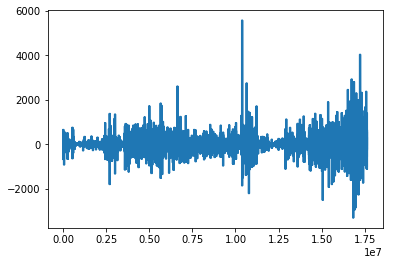

In [18]:
plt.plot(np.concatenate(fft_blocks[100:500]))

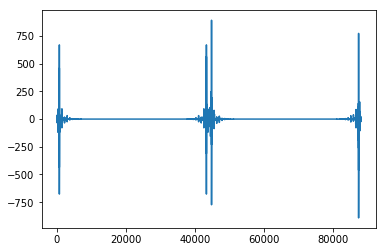

In [19]:
plt.plot(target_blocks[100])

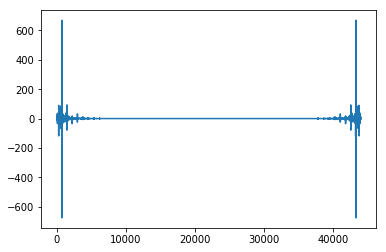

In [20]:
plt.plot(real_blocks[100])

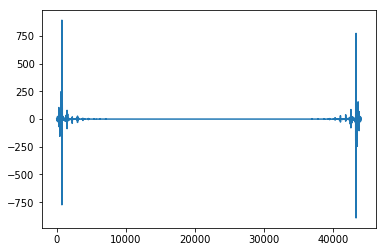

In [21]:
plt.plot(imag_blocks[100])